In [1]:
# Importando as Bibliotecas
import cv2
import numpy as np
from matplotlib import pyplot as plt
from skimage.filters import threshold_local

In [2]:
# Função de Exibição
def imshow(title = "Image", image = None, size = 9):
    w, h = image.shape[0], image.shape[1]
    aspect_ratio = w/h
    plt.figure(figsize=(size * aspect_ratio,size))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.show()

## **Metodos de Limiarização** 

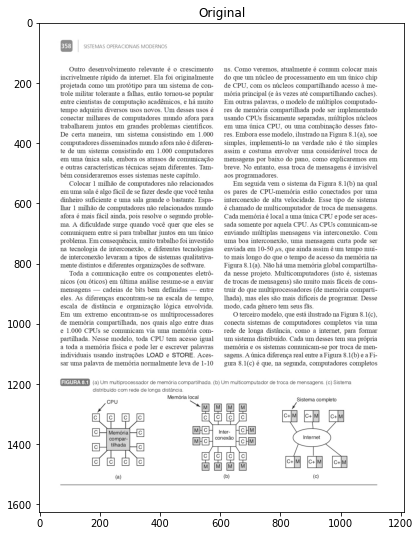

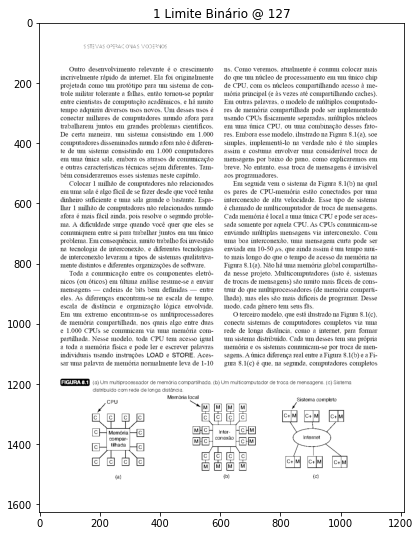

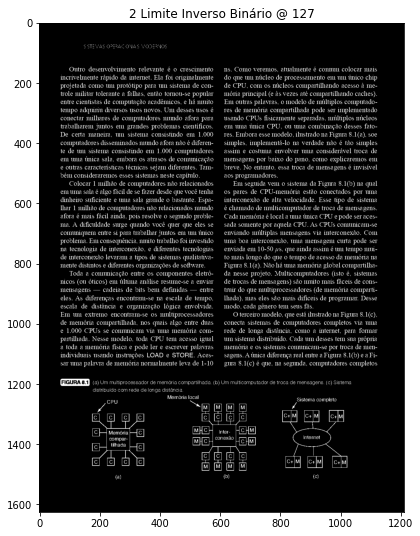

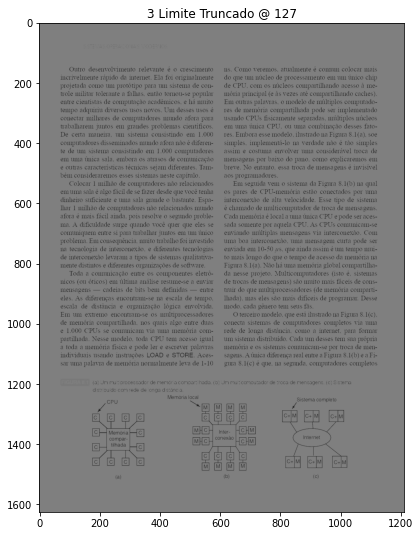

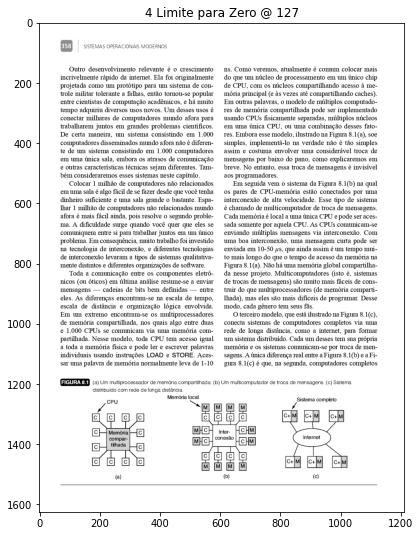

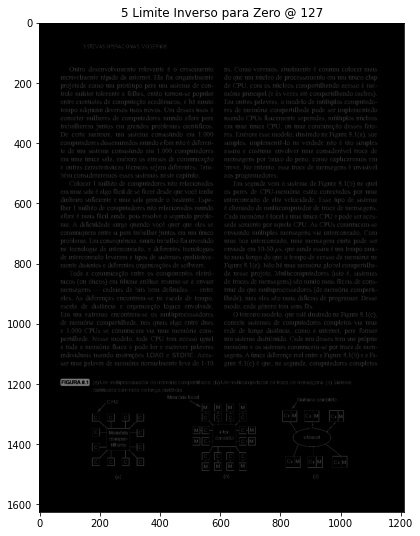

In [3]:
# Carregando e Exibindo Imagem em Escala de Cinza
image = cv2.imread('/content/pag_pages.jpg',0)
imshow("Original", image)

# Valores abaixo de 127 vão para 0 (preto), tudo acima vai para 255 (branco)
ret,thresh1 = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)
imshow('1 Limite Binário @ 127', thresh1)

# Valores abaixo de 127 vão para 255 (branco), valores acima de 127 vão para 0 (preto)
ret,thresh2 = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY_INV)
imshow('2 Limite Inverso Binário @ 127', thresh2)

# Valores acima de 127 são truncados (mantidos) em 127 (o argumento 255 não é usado)
ret,thresh3 = cv2.threshold(image, 127, 255, cv2.THRESH_TRUNC)
imshow('3 Limite Truncado @ 127', thresh3)

# Valores abaixo de 127 vão para 0 (preto), acima de 127 permanecem inalterados
ret,thresh4 = cv2.threshold(image, 127, 255, cv2.THRESH_TOZERO)
imshow('4 Limite para Zero @ 127', thresh4)

# Valores abaixo de 127 permanece inalterado, acima de 127 vai para 0 (preto)
ret,thresh5 = cv2.threshold(image, 127, 255, cv2.THRESH_TOZERO_INV)
imshow('5 Limite Inverso para Zero @ 127', thresh5)

## **Limiarização Adaptável**

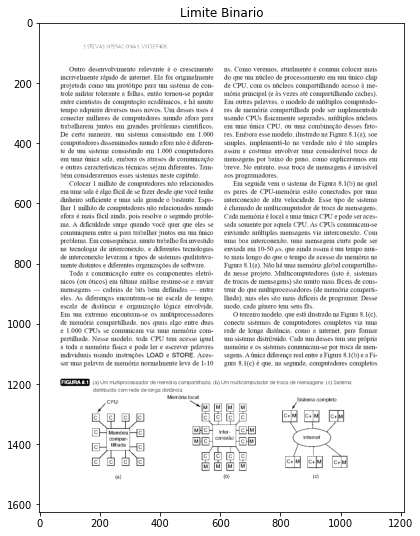

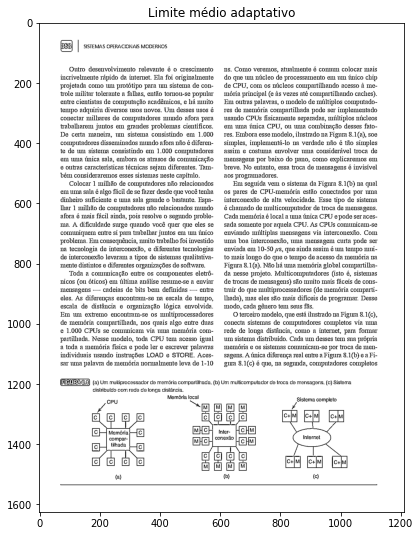

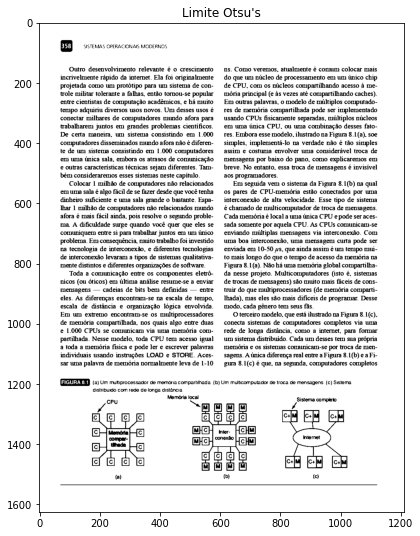

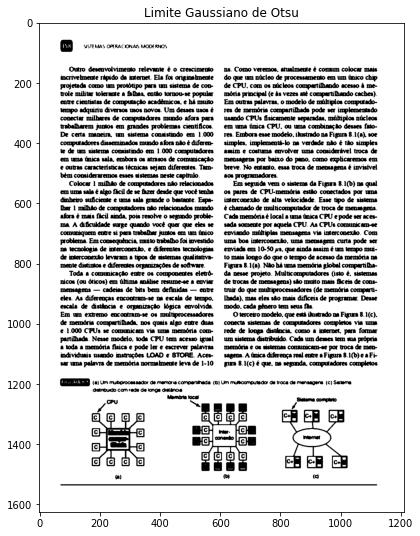

In [4]:
# Valores abaixo de 127 vão para 0 (preto), tudo acima vai para 255 (branco)
ret,thresh1 = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)
imshow('Limite Binario', thresh1)

# Desfocando as imagens, pois remove o ruído
image = cv2.GaussianBlur(image, (3, 3), 0)

# Usando adaptiveThreshold
thresh = cv2.adaptiveThreshold(image, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 3, 5) 
imshow("Limite médio adaptativo", thresh) 

_, th2 = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
imshow("Limite Otsu's", th2) 

# Limiarização de Otsu após filtragem gaussiana
blur = cv2.GaussianBlur(image, (5,5), 0)
_, th3 = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
imshow("Limite Gaussiano de Otsu", th3) 

## **Limiarização Local - SkImage**

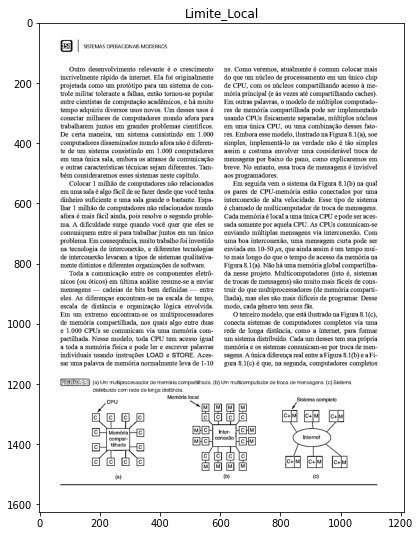

In [5]:
# Carregando Imagem
image = cv2.imread('/content/pag_pages.jpg')

# Obtendo o componente Valor da imagem em HSV e aplicando limiarização adaptável
V = cv2.split(cv2.cvtColor(image, cv2.COLOR_BGR2HSV))[2]
T = threshold_local(V, 25, offset=15, method="gaussian")

# Aplicando a operação de limite
thresh = (V > T).astype("uint8") * 255
imshow("Limite_Local", thresh)

## **Erosão e Dilatação**

Dilatação – Adiciona pixels aos limites dos objetos em uma imagem

Erosão – Remove pixels nos limites dos objetos em uma imagem

Abertura - Erosão seguida de dilatação

Fechamento - Dilatação seguida de erosão

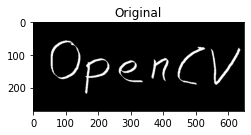

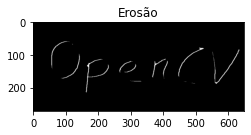

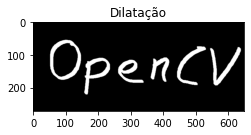

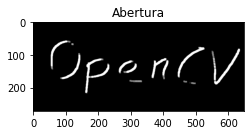

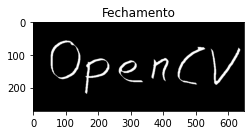

In [6]:
image = cv2.imread('/content/opencv_inv.png', 0)
imshow('Original', image)

# Definindo o tamanho do nosso kernel
kernel = np.ones((5,5), np.uint8)

# Aplicando a Erosão
erosion = cv2.erode(image, kernel, iterations = 1)
imshow('Erosão', erosion)

# Aplicando a Dilatação
dilation = cv2.dilate(image, kernel, iterations = 1)
imshow('Dilatação', dilation)

# Aplicando a Abertura - Bom para remover ruído
opening = cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)
imshow('Abertura',opening)

# Aplicando o Fechamento - Bom para remover ruído
closing = cv2.morphologyEx(image, cv2.MORPH_CLOSE, kernel)
imshow('Fechamento',closing)